# Introduction to Modelling
## Exponential and Logistic Growth

Goals:
- Simple models of dynamics of infection
- Exponential and logistic growth
- **Simulate** to produce **data**
- Visualize for understanding

## Dynamics

*how system changes (**evolves**) over time

## Modelling

### What is a **model**?

*Mathematical/computational description of the world*

- Isolate effects of interest
- Start simple, understand behaviour
- Make more compliocated (add additional effects), understand how results change
- Repeat!

## Modeling Infections
- Let's try to model infection spreading thourgh campus
- Need to make assumptions to start modelling process
- Assumptions must be **explicit**
 

- **Suppose** no influence from outside
- **Suppose** no births or deaths
- **Suppose** infection is transmitted by proximity
- **Suppose** stay infected once infected

### Mathematical Model
- **Mathematical model**: mathematical description of assumptions
- Choose a model in **discrete time**: *n* = days
- Notation: $I_n$ is number of **infectious** people on *n*th day
- $S_n$ is number of **susceptible** people on *n*th day
 
 
 **Suppose** that everybody is either susceptible or infected:
  
  $S_n + I_n = N$ 
 
 and total population $N$ is constant
 
 **Initial conditions**
 - Need to specify initial values at time *n* = 0 
  
      E.g. $I_0 = 1$ and $S_0 = N - 1$
  
 - We will need hypotheses on dynamics of infection:
  Specify how $I_{n+1}$ depends on $I_0, ..., I_n$ 
   
   E.g. $I_{n+1} = f(I_n)$ &rarr; **deterministic** model
    
   or $I_{n+1} = f(I_n) + \xi$ &rarr; **stochastic** model with random fluctuatinos $\xi$
   
**Output of model**
- The output of model will be a **time series**
 
 i.e. vectors of values of $S_n$ and $I_n$ at times $n = 0, ..., T$
- Up to some final time $T$ 
 
- *Possible goal: Obtain time series that "mimics" real-world data*
- *Posiible goal: Understand what effects must be included in model and which ones may not be relevant*

## Simple model of infection
Each individual infects *c* new people each day.

$I_{n+1} = I_n + (c I_n) = I_n(1 + c)$

So

$I_{n+1} = \lambda I_n$, where $\lambda$ := 1 + c -- **growth rate**
 
and $I_0 = 1$

In [2]:
I₀ = 1

1

In [3]:
c = 0.01 # Every individual infects 0.01 new people every day

0.01

In [4]:
λ = 1 + c

1.01

In [5]:
I₁ = λ * I₀

1.01

In [6]:
I₂ = λ * I₁

1.0201

In [7]:
I₃ = λ * I₂

1.030301

## Arrays

In [11]:
T = 10 # final time

I = zeros(T)

10-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [12]:
I[1]

0.0

In [13]:
I[1:3]

3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [14]:
I = zeros(Int64, T)

10-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

## Automate:

In [15]:
I = zeros(T)

10-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [16]:
I[1] = I₀

1

In [22]:
for n in 1:T-1
    I[n+1] = λ * I[n]
    @show n, I[n]
end

# for loops do not return anything

(n, I[n]) = (1, 1.0)
(n, I[n]) = (2, 1.01)
(n, I[n]) = (3, 1.0201)
(n, I[n]) = (4, 1.030301)
(n, I[n]) = (5, 1.04060401)
(n, I[n]) = (6, 1.0510100501)
(n, I[n]) = (7, 1.061520150601)
(n, I[n]) = (8, 1.0721353521070098)
(n, I[n]) = (9, 1.08285670562808)


In [25]:
using Plots

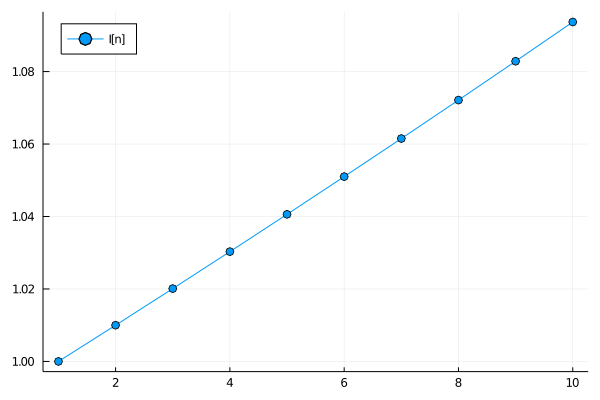

In [26]:
plot(I, m=:o, label="I[n]", legend=:topleft)

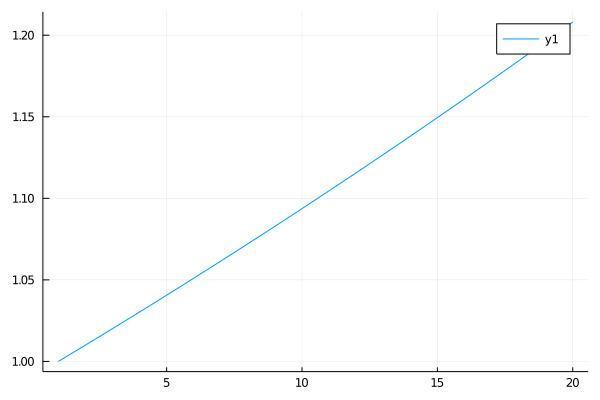

In [29]:
T = 20

I = zeros(T)
I[1] = I₀

for n in 1:T-1
    I[n+1] = λ * I[n]
#     @show n, I[n]
end

plot(I)

## Functions

In [35]:
function run_infection(T=20)    
    I = zeros(T)
    I[1] = I₀
    
    for n in 1:T-1
        I[n+1] = λ * I[n]
    end
    
    return(I)
end

run_infection (generic function with 2 methods)

In [36]:
run_infection()

20-element Vector{Float64}:
 1.0
 1.01
 1.0201
 1.030301
 1.04060401
 1.0510100501
 1.061520150601
 1.0721353521070098
 1.08285670562808
 1.0936852726843609
 1.1046221254112045
 1.1156683466653166
 1.1268250301319698
 1.1380932804332895
 1.1494742132376223
 1.1609689553699987
 1.1725786449236986
 1.1843044313729356
 1.196147475686665
 1.2081089504435316

In [34]:
methods(run_infection)

# 2 methods for generic function "run_infection":
[1] run_infection() in Main at In[32]:1
[2] run_infection(T) in Main at In[32]:1

In [37]:
I_result = run_infection(10)

10-element Vector{Float64}:
 1.0
 1.01
 1.0201
 1.030301
 1.04060401
 1.0510100501
 1.061520150601
 1.0721353521070098
 1.08285670562808
 1.0936852726843609

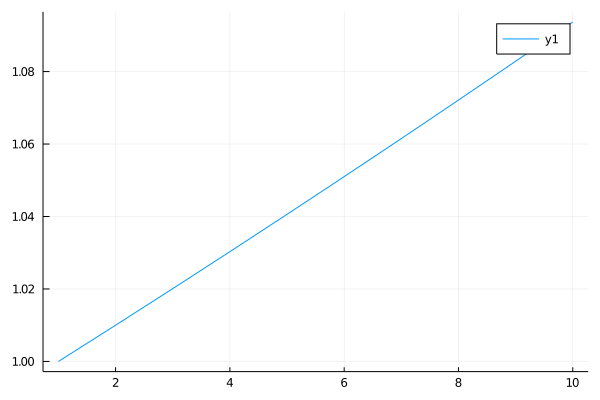

In [38]:
plot(I_result)

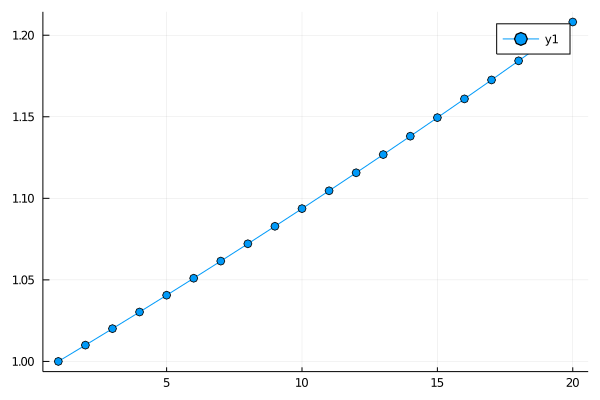

In [39]:
plot(run_infection(20), m=:o) 

In [40]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2984267527063446675\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-9278961802529998064\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2984267527063446675\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [45]:
end_T = 1000
@manipulate for T in slider(1:end_T, value=1) 
    I_result = run_infection(T)
    
    plot(I_result, m=:o)
    
    xlims!(0,end_T)
    ylims!(0,10)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 1000, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/marcon/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/marcon/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/marcon/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/home/marcon/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/home/marcon/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f80e94af730, Task (runnable) @0x00007f80e94af730), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\"

## Exponential Growth

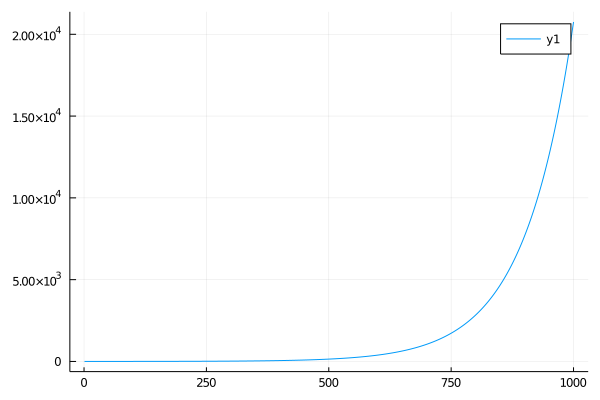

In [46]:
plot(run_infection(1000))

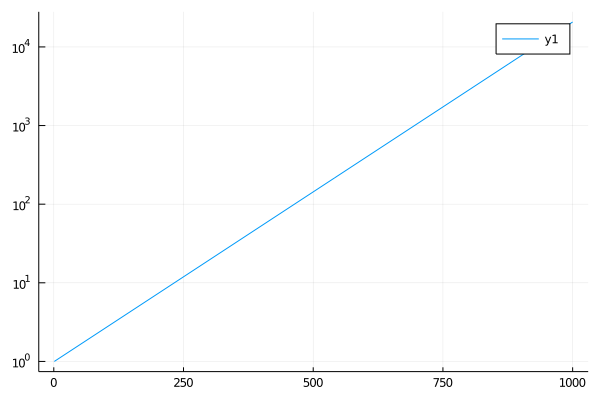

In [47]:
plot(run_infection(1000), yscale=:log10)

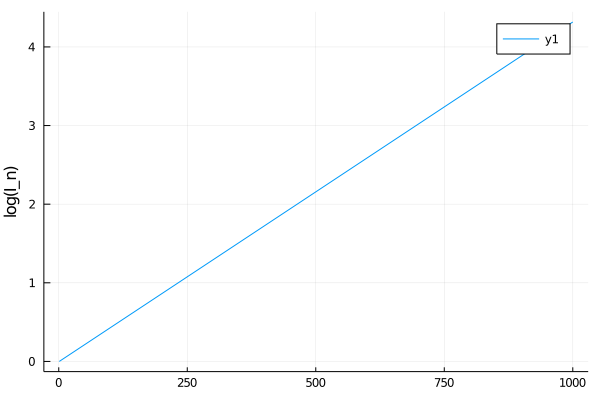

In [52]:
I_result = run_infection(1000)

plot(log10.(I_result)) # log of each element in I_result
ylabel!("log(I_n)")

$\log(I_n) = a n + b$

Take exponentials of 10 of both sides:

$I_n = \exp(an + b) = C e^{an}$

Solve $I_{n+1} = \lambda I_n$:

$I_n = \lambda^n I_0$

$\log(\lambda^n) = n \log(\lambda)$

## Logistic Growth

> Exponential growth is unrealistic: Assumes that there are always more people to infect &rarr; wrong (finite population).

$I_{n+1} = I_n + c I_n$

Each individual will be in contact with a fraction $\alpha$ of the population. At each contact whtere will be a probability $p$ that you infect each person.

So $c = p \alpha$

Original model:
 
$I_{n+1} = I_n + (p \alpha N) I_n$ &rarr; good approxiamtion when almost everybody still susceptible

New model:
 
Can only infect uninfected people!

$I_{n+1} = I_n + (p \alpha S_n) I_n$

$I_{n+1} = I_n + [p \alpha (N - I_n)] I_n = f(I_n)$


$I_{n+1} = I_n + \beta(I_n,S_n) I_n = f(I_n)$ &rarr; $\beta$ is the rate of contact

In [74]:
p = 0.02
α = 0.01
N = 1000

β(I,S) = p * α * (N - I)

function run_infection(T=20)    
    
    I = zeros(T)
    I[1] = I₀
    
    for n in 1:T-1
        I[n+1] = I[n] + β(I[n], N - I[n]) * I[n]
    end
    
    return I
end

run_infection (generic function with 2 methods)

In [75]:
I = run_infection(20)

20-element Vector{Float64}:
  1.0
  1.1998
  1.439472095992
  1.7269520992073721
  2.071746046338255
  2.4852368292698026
  2.9810489147042514
  3.57548136711873
  4.288020827141153
  5.141947568046585
  6.165049156697394
  7.390457421815974
  8.857625133998434
 10.613458656195233
 12.713621286504926
 15.224018310562577
 18.222467825971023
 21.80054972443152
 26.065606875660343
 31.14284507843312

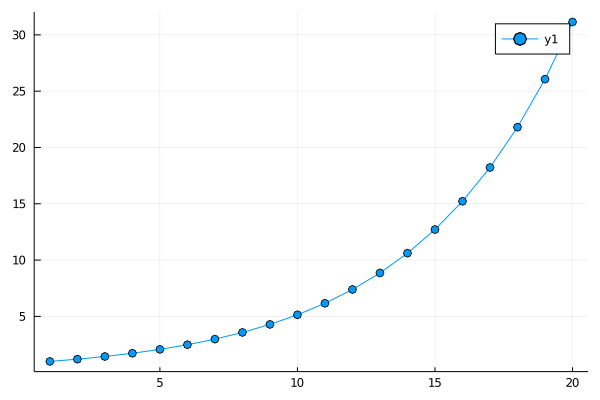

In [77]:
plot(I, m=:o)

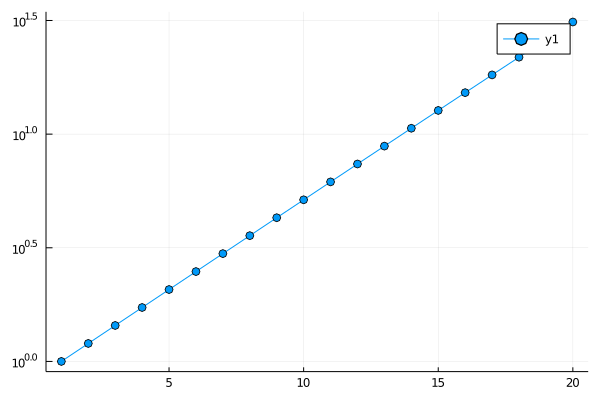

In [78]:
plot(I, m=:o, yscale=:log10)

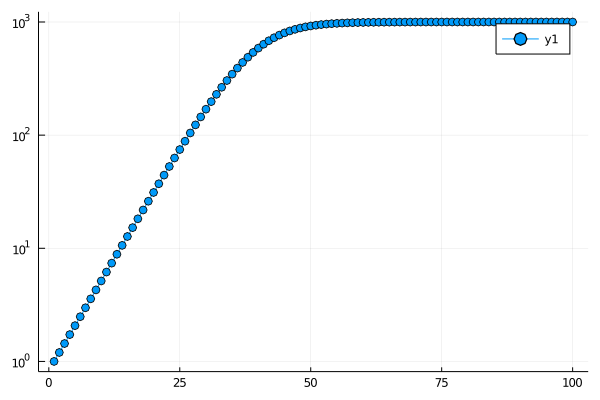

In [79]:
I = run_infection(100)
plot(I, m=:o, yscale=:log10)

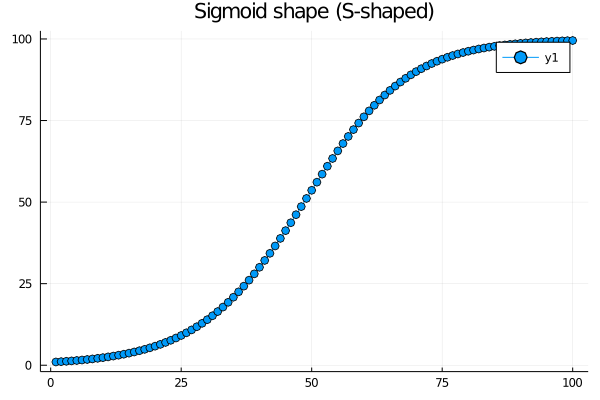

In [81]:
p = 0.01
α = 0.1
N = 100

I = run_infection(100)
plot(I, m=:o)
title!("Sigmoid shape (S-shaped)")

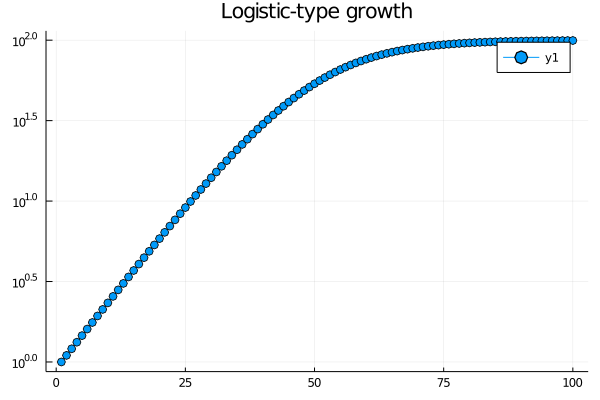

In [84]:
plot(I, m=:o, yscale=:log10)
title!("Logistic-type growth")

## More realism: Heterogeneity of individuals

> Idea: Instead of modelling popuylation globally, model each individual
 
- *Patch model*: Local patches where population is **well mixed**
- *Network model*: Links between nodes

Exponential growth:
 
 $I_{n+1} = \lambda I_n$ &rarr; growth rate changes in time

## Random values

For real random values go to [random.org](www.random.org)

Random numbers between 0 and 1:

In [91]:
[rand() for i in 1:1]

rand() = 0.7259038965677891
rand() = 0.6501870687535087
rand() = 0.4250024512035022
rand() = 0.8201952600359164
rand() = 0.14422847444684228
rand() = 0.7486822095253662
rand() = 0.05867708511376146
rand() = 0.7651590399926838
rand() = 0.21867639768362301
rand() = 0.27539760156985116


Random numbers from a gaussian distribution:

In [92]:
for i in 1:10
    @show randn()
end

randn() = 1.8607960200711762
randn() = 0.36272040436406894
randn() = -2.440994129674222
randn() = 1.0688313947433834
randn() = -0.2612847329349688
randn() = 1.9830022657950983
randn() = -1.1645500710008718
randn() = -0.6449180532234828
randn() = -0.3731236266186792
randn() = -0.8620642627983233


## Add randomness to the infection model

In [94]:
p = 0.02
α = 0.01
N = 1000

β(I, S) = p * α * S

function run_infection(c_average=1.1, T = 20)
    
    I = zeros(T)
    I[1] = I₀
    
    for n in 1:T-1
        c = c_average + 0.1*randn()
        I[n+1] = I[n] + c * I[n]
    end
end

run_infection (generic function with 3 methods)

In [95]:
c_average = 1.1
cs = [c_average + 0.1*randn() for i in 1:100]

100-element Vector{Float64}:
 1.1547245950261458
 1.2324858271933266
 1.1517988436659095
 1.2568181577499358
 1.060598143694681
 1.1433696181326287
 1.1261045717576434
 0.9132395664543387
 0.9421478006358643
 1.1509613206471978
 0.9931987379710914
 1.1825585633431606
 1.1291055884876235
 ⋮
 1.0608796696100975
 1.0217403098937177
 1.0731176643563012
 1.1603533011096783
 1.0728298994546446
 1.0671544238307153
 1.116109557767238
 0.9965900063495665
 1.3235901016957947
 1.2416965857305857
 1.0252650189497001
 1.155079705068042